In [40]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils import*

# Table

In [205]:
results=np.load('../data/results/main.npy')
#results=results[0:92,:,:]

In [206]:
print(np.round(100*results.mean(axis=0),3))

[[0.000000e+00 5.410000e-01 1.668910e+02 1.625640e+02 6.932800e+01]
 [4.226000e+00 2.838808e+03 6.128650e+02 5.327520e+02 9.904750e+02]
 [1.559000e+00 9.908030e+02 2.001060e+02 1.819030e+02 1.964140e+02]
 [4.550000e+00 2.673134e+03 1.944360e+02 1.645490e+02 1.013430e+02]]


In [207]:
print(np.round(100*results.std(axis=0),3))

[[0.00000e+00 1.60000e-02 9.17500e+00 1.06430e+01 2.67400e+01]
 [4.25000e-01 9.81567e+02 5.87630e+01 5.36640e+01 1.05244e+02]
 [5.75000e-01 2.15974e+02 1.27230e+01 1.02970e+01 9.82700e+00]
 [1.95700e+00 4.98443e+02 1.12060e+01 8.62400e+00 3.21160e+01]]


# Histograms

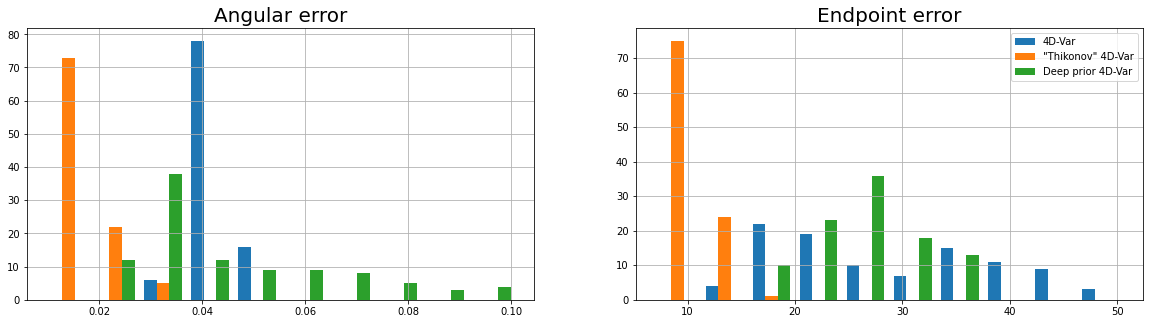

In [208]:
bins=10
plt.figure(figsize=(20,5))

titles=["Endpoint error","Angular error"]
for i in range(0,2):
    plt.subplot(1,2,i+1)
    
    plt.hist([results[:,j,i] for j in range(1,4)], 
             bins, label=['4D-Var','"Thikonov" 4D-Var', 'Deep prior 4D-Var'])
    if i == 1:
        plt.legend(loc='upper right')
    plt.title(titles[i-1],fontsize=20)
    plt.grid()
plt.show()

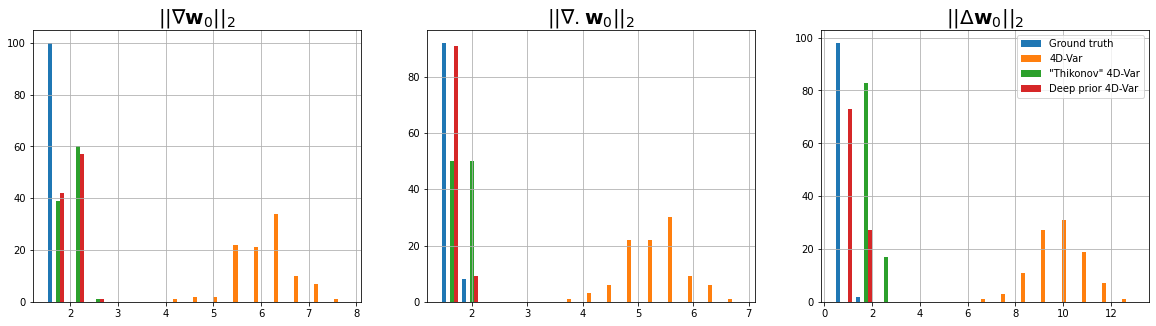

In [213]:
bins=15
plt.figure(figsize=(20,5))

titles=[r"$\|| \nabla\mathbf{w}_0\||_2$",r"$\|| \nabla . \mathbf{w}_0\||_2$",'$\||\Delta \mathbf{w}_0\||_2$']
for i in range(2,results.shape[2]):
    plt.subplot(1,3,i-1)
    
    plt.hist([results[:,j,i] for j in range(4)], 
             bins, label=['Ground truth', '4D-Var','"Thikonov" 4D-Var', 'Deep prior 4D-Var'])
    if i == 4:
        plt.legend(loc='upper right')
    plt.title(titles[i-2],fontsize=20)
    plt.grid()
plt.savefig('../figures/hist.pdf',bbox_inches='tight')
plt.show()

# plot

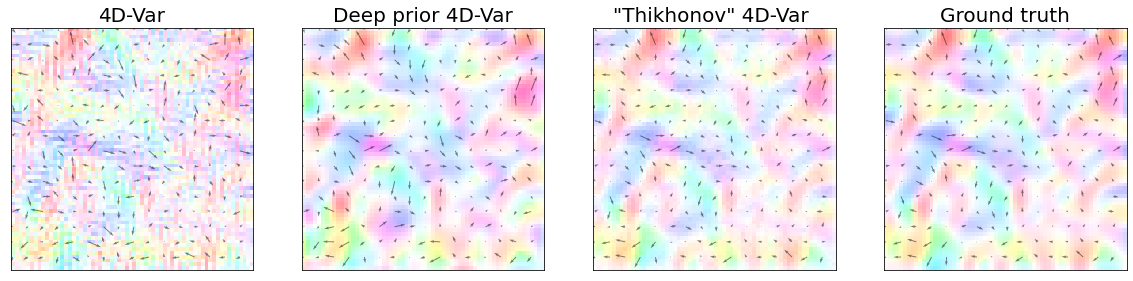

In [137]:
i=0

root_dir = '../data/generated/'
save_dir = '../data/estimated/'

initial_condition=np.load(root_dir+'initial_conditions/'+'{0:04}'.format(int(i))+'.npy')
w0_truth=initial_condition[1:,:,:]

w0_4dvar=np.load(save_dir+'4DVar/'+'{0:04}'.format(int(i))+'.npy')
w0_4dvar_reg=np.load(save_dir+'4DVar_reg/'+'{0:04}'.format(int(i))+'.npy')
w0_4dvar_deep=np.load(save_dir+'4DVar_deep/'+'{0:04}'.format(int(i))+'.npy')

u0_truth=torch.Tensor(w0_truth[0,:,:])
v0_truth=torch.Tensor(w0_truth[1,:,:])
    
u0_4dvar=torch.Tensor(w0_4dvar[0,:,:])
v0_4dvar=torch.Tensor(w0_4dvar[1,:,:])

u0_4dvar_reg=torch.Tensor(w0_4dvar_reg[0,:,:])
v0_4dvar_reg=torch.Tensor(w0_4dvar_reg[1,:,:])

u0_4dvar_deep=torch.Tensor(w0_4dvar_deep[0,:,:])
v0_4dvar_deep=torch.Tensor(w0_4dvar_deep[1,:,:])

normalization = True
quiver = True
q_alpha = 0.5
q_scale =2.5
sub=4

plt.figure(figsize=(20,10))
    
plt.subplot(1,4,1)
plot_w(u0_4dvar,v0_4dvar,
       normalization=normalization,
       quiver=quiver, q_alpha=q_alpha,q_scale=q_scale,
       title = '4D-Var')
plt.title('4D-Var',fontsize=20)

plt.subplot(1,4,2)
plot_w(u0_4dvar_deep,v0_4dvar_deep,
       normalization=normalization,
       quiver=quiver, q_alpha=q_alpha,q_scale=q_scale,
       title = 'Deep prior 4D-Var')
plt.title('Deep prior 4D-Var',fontsize=20)

plt.subplot(1,4,3)
plot_w(u0_4dvar_reg,v0_4dvar_reg,
       normalization=normalization,
       quiver=quiver, q_alpha=q_alpha,q_scale=q_scale,
       title = '4D-Var + Thikhonov')
plt.title('"Thikhonov" 4D-Var ',fontsize=20)

plt.subplot(1,4,4)
plot_w(u0_truth,v0_truth,
       normalization=normalization,
       quiver=quiver, q_alpha=q_alpha,q_scale=q_scale,
       title = '')
plt.title('Ground truth',fontsize=20)
plt.savefig('../figures/compare_assim.pdf',bbox_inches='tight')
plt.show()